In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('Hasil_Preprocessing_Test v2.xlsx')
df_train = pd.read_excel('Dataset_Final.xlsx')

In [3]:
df

text  \
0    Program Kartu Prakerja dinilai banyak pihak pe...   
1    29 Ribu Peserta Kartu Prakerja 'Dipecat', BLT ...   
2    @budimandjatmiko @Fari_Siregar Physing bisa di...   
3    29 Ribu Peserta Kartu Prakerja 'Dipecat', BLT ...   
4    Kartu Prakerja Dinilai Jawab Kebutuhan Pekerja...   
..                                                 ...   
146  @ovo_id tolong bantu saya krn saya suda kesal ...   
147  for more information:\n✉ infokartuprakerja@bin...   
148  @YourEgoKiller @Risolmayooo_ @CNNIndonesia Yan...   
149  Kartu Prakerja: Hari Terakhir untuk Dapat Inse...   
150  Kaga tau aja kalo jadi joki prakerja bisa kaya...   

                                                 final  
0    program kartu prakerja nilai perintah program ...  
1         ribu kartu prakerja pecat blt rp juta layang  
2    physing laku masuk kriteria hack kumpul databa...  
3         ribu kartu prakerja pecat blt rp juta layang  
4                     kartu prakerja nilai butuh kerja  
..                                                 ...  
146  tolong bantu suda kesal ovomasa tranfer uang p...  
147  more information infokartuprakerja bus busi bi...  
148                                   korupsi prakerja  
149                    kartu prakerja insentif rp juta  
150                                 joki prakerja kaya  

[151 rows x 2 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    151 non-null    object
 1   final   151 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


## NBC

In [5]:
import pickle

tfidf = pickle.load(open("tfidf_vectorizer.pkl", "rb"))
model_nbc = pickle.load(open('NBC.pkl', 'rb'))

In [6]:
tfidf.fit(df_train.final_tweet)
df_tfidf = tfidf.transform(df.final)

In [7]:
hasil_nbc = model_nbc.predict(df_tfidf)

## CNN

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

model_cnn = tf.keras.models.load_model('model_CNN.h5')
model_cnn_lr = tf.keras.models.load_model('model2_lr.h5')

def convert_predict_cnn(predict):
    x = []
    for i in predict :
        if i == 0 :
            x.append('negatif')
        elif i == 1 :
            x.append('netral')
        else :
            x.append('positif')
    return x

def preprocessing_cnn(X_train,X_test,Test=False):
    tokenizer = Tokenizer(num_words=5000, oov_token='-')   
    tokenizer.fit_on_texts(X_test)
    tokenizer.fit_on_texts(X_train)
    
    sekuens_test = tokenizer.texts_to_sequences(X_test)
    padded_test = pad_sequences(sekuens_test)
    
    if Test == False :
        sekuens_train = tokenizer.texts_to_sequences(X_train)
        padded_train = pad_sequences(sekuens_train) 
        return padded_train, padded_test
        
    else :
        return padded_test

In [9]:
padded_test = preprocessing_cnn(df_train.final_tweet,df.final,Test=True)

In [10]:
pred_cnn1 = model_cnn.predict(padded_test)
pred_cnn2 = model_cnn_lr.predict(padded_test)

In [11]:
hasil_cnn1 = convert_predict_cnn(np.argmax(pred_cnn1, axis=1))
hasil_cnn2 = convert_predict_cnn(np.argmax(pred_cnn2, axis=1))

## Visualisasi 

In [12]:
df['CNN'] = hasil_cnn1
df['CNN + learning rate'] = hasil_cnn2
df['NBC'] = hasil_nbc

In [13]:
df

text  \
0    Program Kartu Prakerja dinilai banyak pihak pe...   
1    29 Ribu Peserta Kartu Prakerja 'Dipecat', BLT ...   
2    @budimandjatmiko @Fari_Siregar Physing bisa di...   
3    29 Ribu Peserta Kartu Prakerja 'Dipecat', BLT ...   
4    Kartu Prakerja Dinilai Jawab Kebutuhan Pekerja...   
..                                                 ...   
146  @ovo_id tolong bantu saya krn saya suda kesal ...   
147  for more information:\n✉ infokartuprakerja@bin...   
148  @YourEgoKiller @Risolmayooo_ @CNNIndonesia Yan...   
149  Kartu Prakerja: Hari Terakhir untuk Dapat Inse...   
150  Kaga tau aja kalo jadi joki prakerja bisa kaya...   

                                                 final      CNN  \
0    program kartu prakerja nilai perintah program ...  positif   
1         ribu kartu prakerja pecat blt rp juta layang   netral   
2    physing laku masuk kriteria hack kumpul databa...  positif   
3         ribu kartu prakerja pecat blt rp juta layang   netral   
4                     kartu prakerja nilai butuh kerja  positif   
..                                                 ...      ...   
146  tolong bantu suda kesal ovomasa tranfer uang p...  negatif   
147  more information infokartuprakerja bus busi bi...  negatif   
148                                   korupsi prakerja   netral   
149                    kartu prakerja insentif rp juta   netral   
150                                 joki prakerja kaya  positif   

    CNN + learning rate      NBC  
0               positif  positif  
1                netral  positif  
2               positif  positif  
3                netral  positif  
4               positif  positif  
..                  ...      ...  
146             negatif  negatif  
147              netral   netral  
148              netral  negatif  
149             positif  negatif  
150              netral  negatif  

[151 rows x 5 columns]

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ast

### CNN

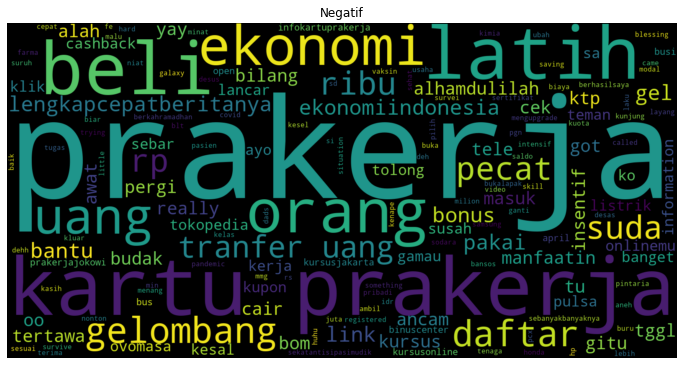

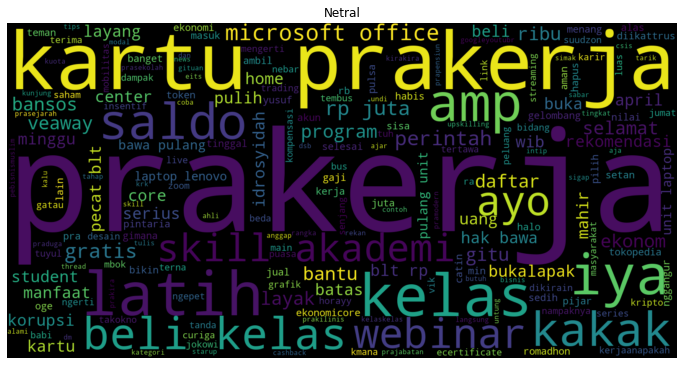

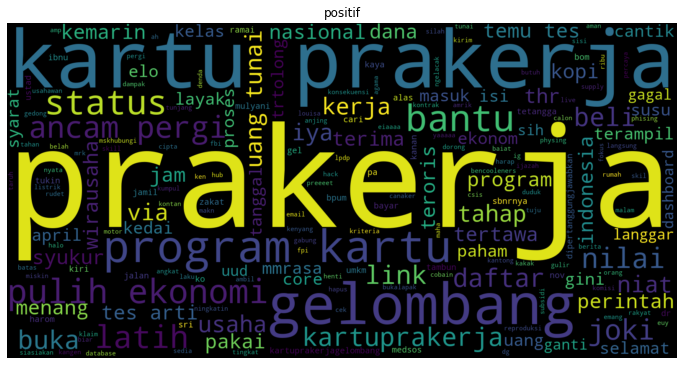

In [15]:
#CNN
raw_tweets = []
for x in df[df.CNN == 'negatif'].final :
    raw_tweets.append(x)
wordcloud = WordCloud(width=1600, height=800,max_font_size=400).generate(' '.join([str(elem) for elem in raw_tweets]))
plt.figure(figsize=(12,10))
plt.title('Negatif')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

raw_tweets = []
for x in df[df.CNN == 'netral'].final :
    raw_tweets.append(x)
wordcloud = WordCloud(width=1600, height=800,max_font_size=400).generate(' '.join([str(elem) for elem in raw_tweets]))
plt.figure(figsize=(12,10))
plt.title('Netral')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

raw_tweets = []
for x in df[df.CNN == 'positif'].final :
    raw_tweets.append(x)
wordcloud = WordCloud(width=1600, height=800,max_font_size=400).generate(' '.join([str(elem) for elem in raw_tweets]))
plt.figure(figsize=(12,10))
plt.title('positif')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=df.CNN, hole=.2)])
fig.update_traces(title_text="Hasil CNN",
                  title_position="top center",
                  title_font_size=20)
fig.update_layout(
    autosize=False,
    width=500,
    height=500)
fig.show()

### CNN2

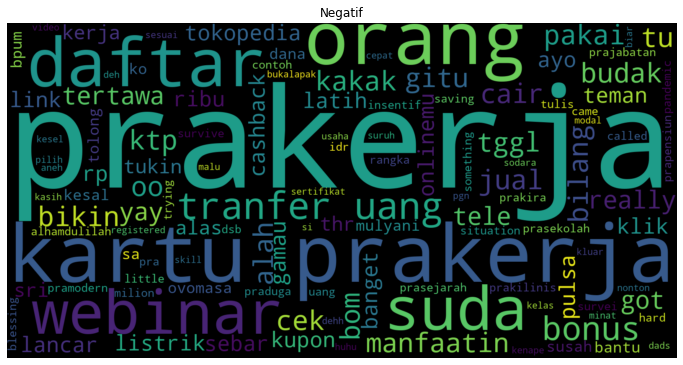

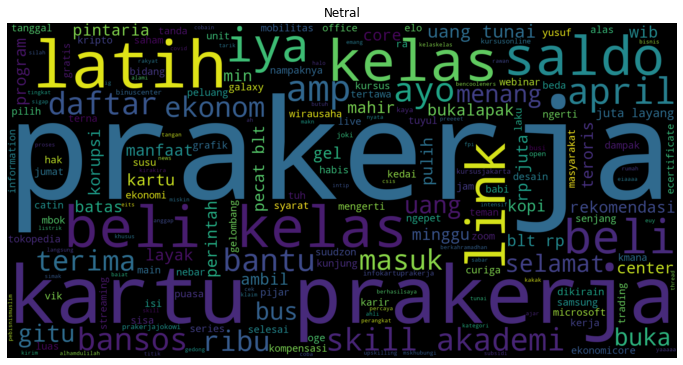

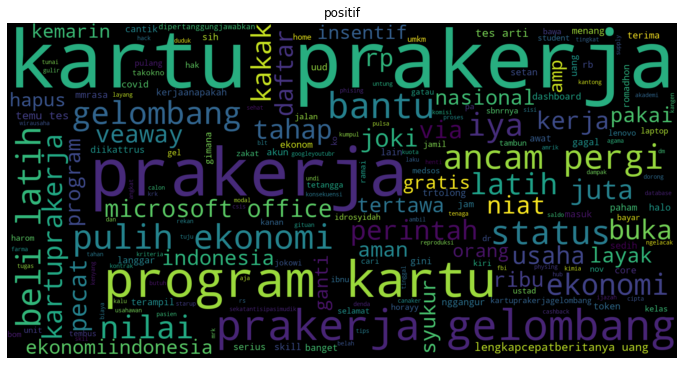

In [17]:
#CNN2
raw_tweets = []
for x in df[df['CNN + learning rate'] == 'negatif'].final :
    raw_tweets.append(x)
wordcloud = WordCloud(width=1600, height=800,max_font_size=400).generate(' '.join([str(elem) for elem in raw_tweets]))
plt.figure(figsize=(12,10))
plt.title('Negatif')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

raw_tweets = []
for x in df[df['CNN + learning rate'] == 'netral'].final :
    raw_tweets.append(x)
wordcloud = WordCloud(width=1600, height=800,max_font_size=400).generate(' '.join([str(elem) for elem in raw_tweets]))
plt.figure(figsize=(12,10))
plt.title('Netral')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

raw_tweets = []
for x in df[df['CNN + learning rate'] == 'positif'].final :
    raw_tweets.append(x)
wordcloud = WordCloud(width=1600, height=800,max_font_size=400).generate(' '.join([str(elem) for elem in raw_tweets]))
plt.figure(figsize=(12,10))
plt.title('positif')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=df['CNN + learning rate'], hole=.2)])
fig.update_traces(title_text="Hasil CNN Optimasi LR",
                  title_position="top center",
                  title_font_size=20)
fig.update_layout(
    autosize=False,
    width=500,
    height=500)
fig.show()

### NBC

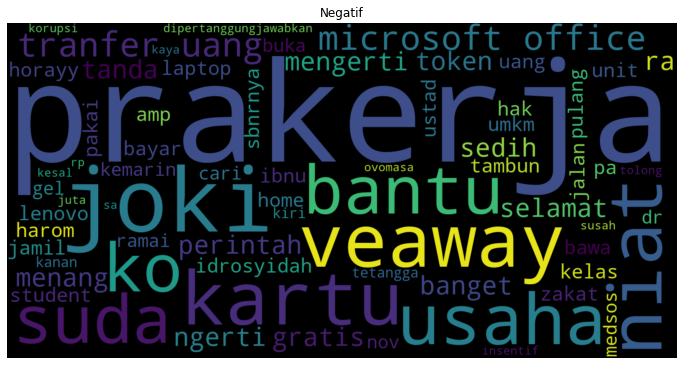

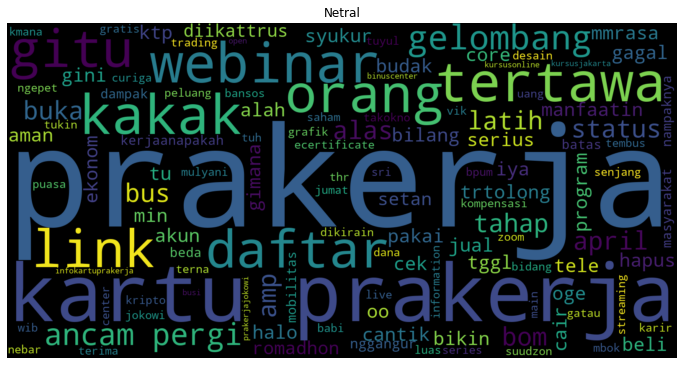

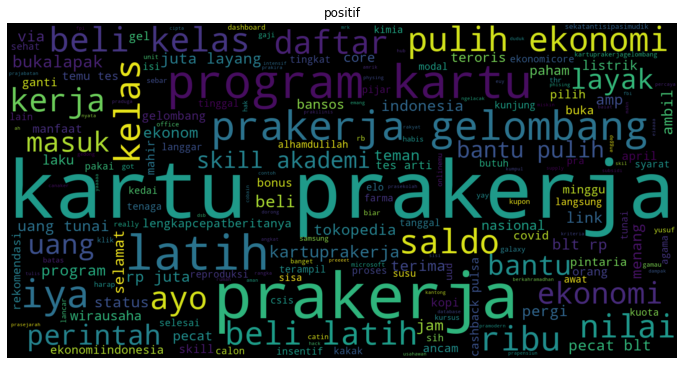

In [19]:
#NBC
raw_tweets = []
for x in df[df.NBC == 'negatif'].final :
    raw_tweets.append(x)
wordcloud = WordCloud(width=1600, height=800,max_font_size=400).generate(' '.join([str(elem) for elem in raw_tweets]))
plt.figure(figsize=(12,10))
plt.title('Negatif')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

raw_tweets = []
for x in df[df.NBC == 'netral'].final :
    raw_tweets.append(x)
wordcloud = WordCloud(width=1600, height=800,max_font_size=400).generate(' '.join([str(elem) for elem in raw_tweets]))
plt.figure(figsize=(12,10))
plt.title('Netral')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

raw_tweets = []
for x in df[df.NBC == 'positif'].final :
    raw_tweets.append(x)
wordcloud = WordCloud(width=1600, height=800,max_font_size=400).generate(' '.join([str(elem) for elem in raw_tweets]))
plt.figure(figsize=(12,10))
plt.title('positif')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=df.NBC, hole=.2)])
fig.update_traces(title_text="Hasil NBC",
                  title_position="top center",
                  title_font_size=20)
fig.update_layout(
    autosize=False,
    width=500,
    height=500)
fig.show()

In [21]:
df

text  \
0    Program Kartu Prakerja dinilai banyak pihak pe...   
1    29 Ribu Peserta Kartu Prakerja 'Dipecat', BLT ...   
2    @budimandjatmiko @Fari_Siregar Physing bisa di...   
3    29 Ribu Peserta Kartu Prakerja 'Dipecat', BLT ...   
4    Kartu Prakerja Dinilai Jawab Kebutuhan Pekerja...   
..                                                 ...   
146  @ovo_id tolong bantu saya krn saya suda kesal ...   
147  for more information:\n✉ infokartuprakerja@bin...   
148  @YourEgoKiller @Risolmayooo_ @CNNIndonesia Yan...   
149  Kartu Prakerja: Hari Terakhir untuk Dapat Inse...   
150  Kaga tau aja kalo jadi joki prakerja bisa kaya...   

                                                 final      CNN  \
0    program kartu prakerja nilai perintah program ...  positif   
1         ribu kartu prakerja pecat blt rp juta layang   netral   
2    physing laku masuk kriteria hack kumpul databa...  positif   
3         ribu kartu prakerja pecat blt rp juta layang   netral   
4                     kartu prakerja nilai butuh kerja  positif   
..                                                 ...      ...   
146  tolong bantu suda kesal ovomasa tranfer uang p...  negatif   
147  more information infokartuprakerja bus busi bi...  negatif   
148                                   korupsi prakerja   netral   
149                    kartu prakerja insentif rp juta   netral   
150                                 joki prakerja kaya  positif   

    CNN + learning rate      NBC  
0               positif  positif  
1                netral  positif  
2               positif  positif  
3                netral  positif  
4               positif  positif  
..                  ...      ...  
146             negatif  negatif  
147              netral   netral  
148              netral  negatif  
149             positif  negatif  
150              netral  negatif  

[151 rows x 5 columns]

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, 
                    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['CNN', 'CNN+LR','NBC'])
fig.add_trace(go.Pie(labels=df['NBC'], name="NBC"),
              1, 3)
fig.add_trace(go.Pie(labels=df['CNN'], name="CNN + LR"),
              1, 2)
fig.add_trace(go.Pie(labels=df['CNN + learning rate'], name="CNN"),
              1, 1)

fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(title_text="Hasil Prediksi Data Test")
fig.show()

In [23]:
df.to_excel("Hasil_Predict v2.xlsx", index = False)